# Problem Tanımı


Farklı kategorilerdeki balıklara ait bir görüntü veri seti sağlanmıştır. Amacımız, bir resmi temel alarak balık kategorisini tanımlayan bir model oluşturmaktır.

In [20]:
import numpy as np 
import pandas as pd
import os

## Veri Okuma

Görüntü yolu ve etkiketi ile veri çerçevesi oluşturma

In [21]:
dir = '../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        if os.path.splitext(filename)[1]=='.png':
            if dirname.split()[-1]!='GT':          
                label.append(os.path.split(dirname)[1])
                path.append(os.path.join(dirname,filename))

df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [22]:
df.head()


,path,label
0,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
1,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
2,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
3,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
4,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


DataFrame, iki sütunla oluşturulmuştur:

1. path: Klasördeki görsellere giden yolları içerecek.
2. Label: Görselin karşılık geldiği etiket adını içerecek.

"label" sütununu kategori türüne dönüştürme.


In [24]:
df['label']=df['label'].astype('category')


In [25]:
df['label'].value_counts()


label
Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: count, dtype: int64

9 farklı balık kategorisi vardır ve her biri eşit şekilde dağıtılmıştır, bu nedenle verilerde dengesizlik sorunu yoktur.

## Keşifsel Veri Analizi

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df['label'].unique()


['Hourse Mackerel', 'Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Trout', 'Striped Red Mullet', 'Shrimp', 'Gilt-Head Bream', 'Red Sea Bream']
Categories (9, object): ['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', ..., 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']

Her kategoriden 1 örnek görseli çizelim.








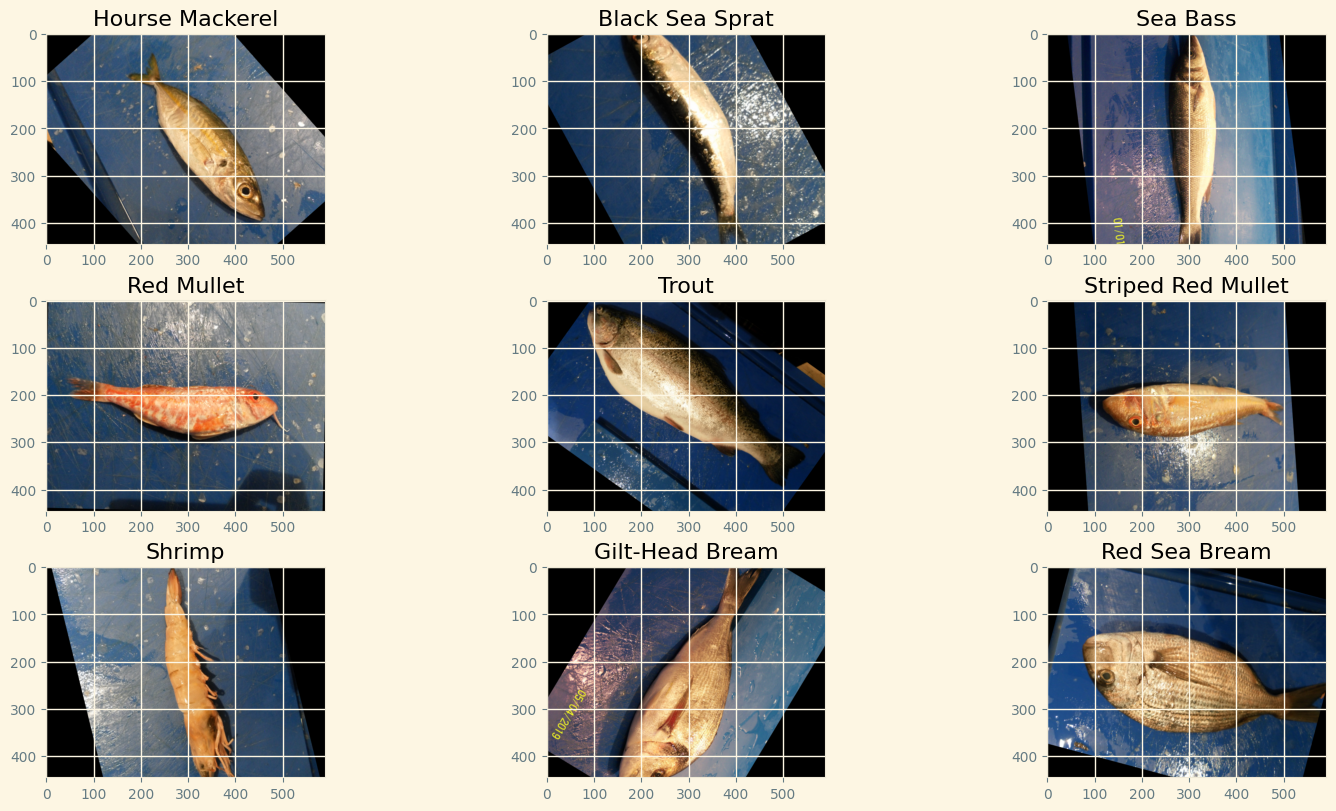

In [37]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,8), constrained_layout=True)
ax=ax.flatten()
j=0
for i in df['label'].unique():
    
    ax[j].imshow(plt.imread(df[df['label']==i].iloc[0,0]))
    ax[j].set_title(i)
    j=j+1

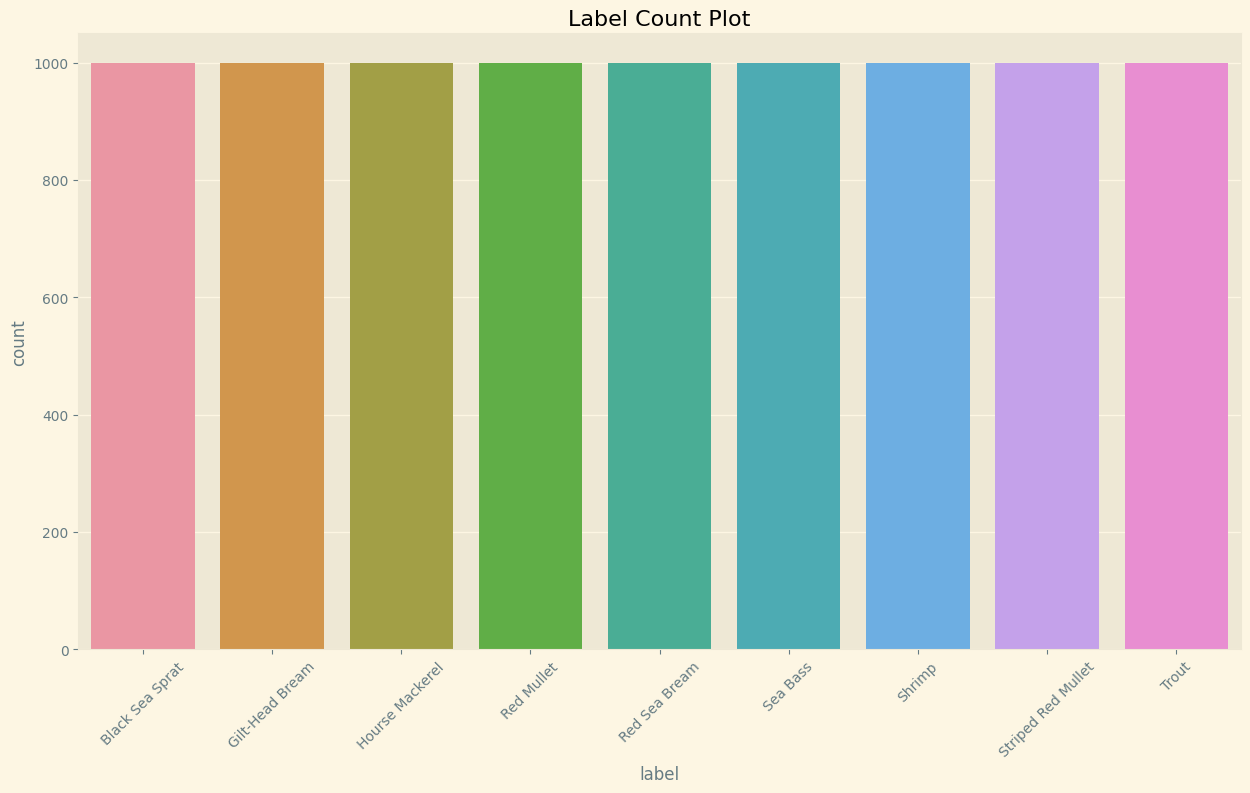

In [39]:
plt.figure(figsize=(15,8))
sns.countplot(x='label', data=df)  # x argümanını anahtar kelime olarak geçin
plt.xticks(rotation=45)
plt.title('Label Count Plot')
plt.show()


In [31]:
plt.imread(df['path'][1]).shape

(445, 590, 3)

## Eğitim-Test Ayırma



In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test=train_test_split(df, test_size=0.2, random_state=42)

In [42]:
print(X_train.shape)
print(X_test.shape)

(7200, 2)
(1800, 2)


## TensorFlow kullanarak görüntü veri setini oluşturma
 ResNet modeli için transfer öğreniminde kullanıp kullanamayacağımızı kontrol etmek için resnet_v2 ön işleme adımını kullanıyoruz.

In [43]:
from tensorflow.keras.applications import ResNet50V2, MobileNetV2
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainGen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.3)
testGen =ImageDataGenerator(preprocessing_function= preprocess_input)
X_train_img = trainGen.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',class_mode='categorical', subset='training', color_mode='rgb', batch_size=32)
X_val_img = trainGen.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',class_mode='categorical', subset='validation', color_mode='rgb', batch_size=32)
X_test_img =testGen.flow_from_dataframe(dataframe=X_test, x_col='path', y_col='label',class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)

Found 5040 validated image filenames belonging to 9 classes.
Found 2160 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


Ön işleme sonrası görüntüleri çizme

Label: [[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Label: [[0. 0. 0. 0. 0. 1. 0. 0.

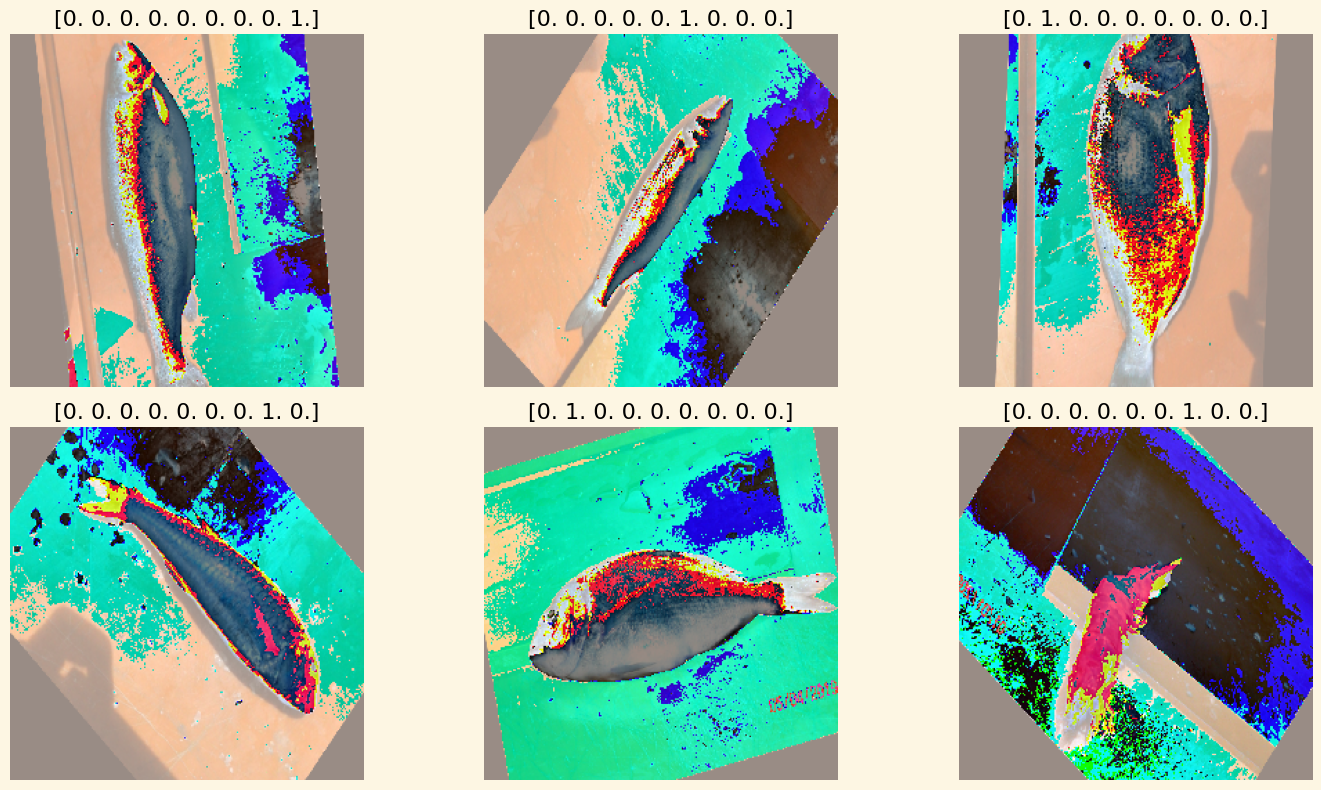

In [52]:
fit, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
ax = ax.flatten()
j = 0
for _ in range(6):
    img, label = next(X_test_img)  # next() fonksiyonu ile görseli ve etiketi al
    ax[j].imshow(img[0].astype('uint8'))  # Görseli uygun formata çevir

    # Label'ı kontrol et
    print("Label:", label)  # Label'ı kontrol et
    if isinstance(label, np.ndarray) and label.size > 0:
        ax[j].set_title(str(label[0]))  # İlk etiketi başlık olarak ayarla
    else:
        ax[j].set_title("Unknown Label")  # Eğer etiket yoksa varsayılan başlık

    ax[j].axis('off')  # Eksenleri kapat
    j += 1

plt.tight_layout()  # Görseller arasındaki boşluğu ayarla
plt.show()  # Görselleri göster


In [55]:
X_test_img[0][0].shape


(32, 256, 256, 3)

In [57]:
image_shape=(256,256,3)


Test ve Eğitim veri setindeki sınıfların uygunluğunu kontrol edelim

In [58]:
X_train_img.class_indices


{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [59]:
X_val_img.class_indices


{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [60]:
X_test_img.class_indices


{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

## Tensorflow Model

MobileNet Transfer Öğrenimi








In [61]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
pre_trained= MobileNetV2(include_top=False, pooling='avg', input_shape=image_shape)

#for layers in pre_trained.layers:
#    layers.trainable=False
pre_trained.trainable=False

inp_model = pre_trained.input
#x=Flatten()(pre_trained.output)
x=Dense(128, activation='relu')(pre_trained.output)
x=Dropout(0.5)(x)
x=Dense(128, activation='relu')(x)
output=Dense(9, activation='softmax')(x)
model = Model(inputs=inp_model, outputs=output)




model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=1)

results = model.fit(X_train_img,epochs=30,
                              validation_data=X_val_img,
                                callbacks=[early_stop])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


I0000 00:00:1729460475.405974     291 service.cc:145] XLA service 0x7f0948004ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729460475.406026     291 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/158 ━━━━━━━━━━━━━━━━━━━━ 42:35 16s/step - accuracy: 0.0938 - loss: 2.6206

I0000 00:00:1729460481.753920     291 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


158/158 ━━━━━━━━━━━━━━━━━━━━ 145s 820ms/step - accuracy: 0.3449 - loss: 1.7867 - val_accuracy: 0.7495 - val_loss: 0.7245
Epoch 2/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 79s 485ms/step - accuracy: 0.6627 - loss: 0.8912 - val_accuracy: 0.8431 - val_loss: 0.4547
Epoch 3/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 79s 482ms/step - accuracy: 0.7759 - loss: 0.6454 - val_accuracy: 0.8588 - val_loss: 0.3913
Epoch 4/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 77s 475ms/step - accuracy: 0.8161 - loss: 0.5194 - val_accuracy: 0.9093 - val_loss: 0.2786
Epoch 5/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 77s 476ms/step - accuracy: 0.8421 - loss: 0.4195 - val_accuracy: 0.9074 - val_loss: 0.2637
Epoch 6/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 78s 481ms/step - accuracy: 0.8676 - loss: 0.3728 - val_accuracy: 0.9157 - val_loss: 0.2324
Epoch 7/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 78s 481ms/step - accuracy: 0.8758 - loss: 0.3374 - val_accuracy: 0.9338 - val_loss: 0.1857
Epoch 8/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 79s 484ms/step - accuracy: 0.8998 - loss: 0.2812 - va

Text(0.5, 1.0, 'Loss')

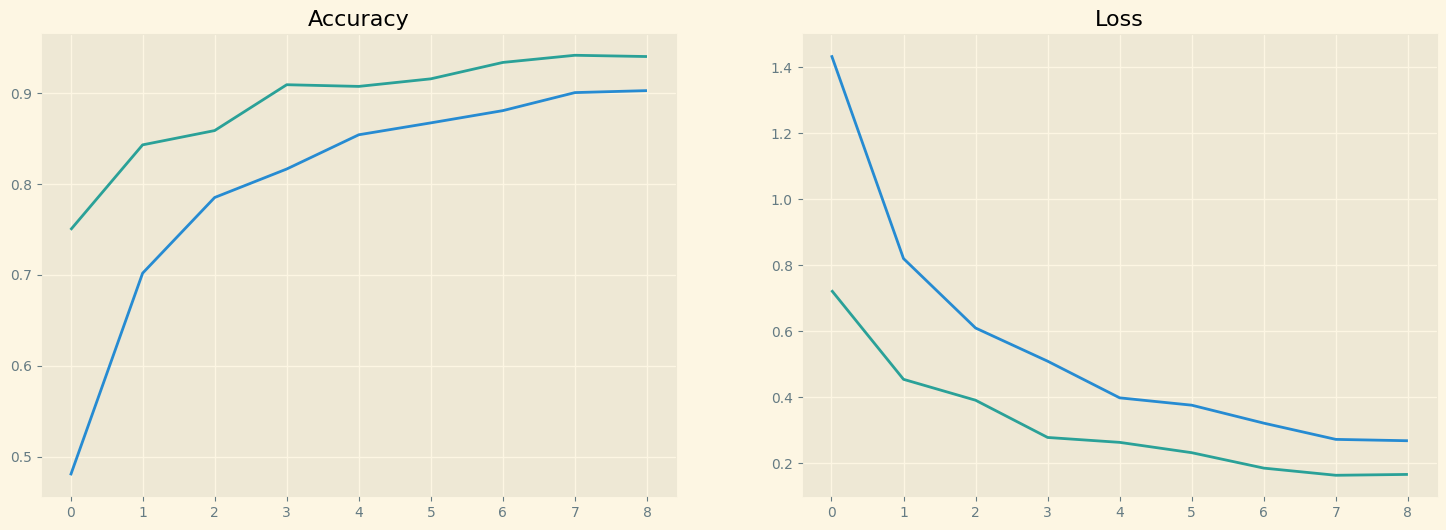

In [66]:
result=pd.DataFrame(results.history)
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(18,6))
ax=ax.flatten()
ax[0].plot(result[['accuracy','val_accuracy']])
ax[0].set_title("Accuracy")
ax[1].plot(result[['loss','val_loss']])
ax[1].set_title("Loss")

## Model Tahmini


In [67]:
pred = model.predict(X_test_img)
pred=np.argmax(pred,axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 37s 610ms/step


In [68]:
pred_df=X_test.copy()
labels={}
for l,v in X_test_img.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

Accuracy Score: 0.9405555555555556


<Axes: >

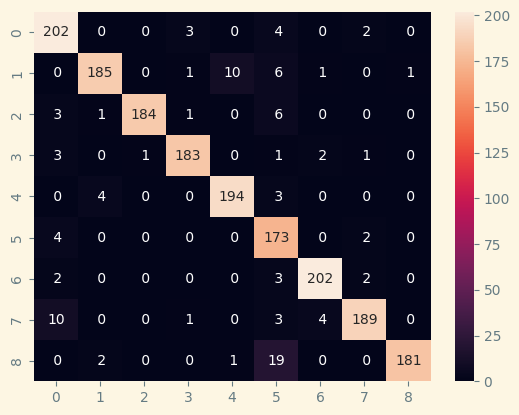

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')

                                                   path               label  \
7940  ../input/a-large-scale-fish-dataset/Fish_Datas...     Gilt-Head Bream   
1162  ../input/a-large-scale-fish-dataset/Fish_Datas...     Black Sea Sprat   
582   ../input/a-large-scale-fish-dataset/Fish_Datas...     Hourse Mackerel   
8412  ../input/a-large-scale-fish-dataset/Fish_Datas...       Red Sea Bream   
8730  ../input/a-large-scale-fish-dataset/Fish_Datas...       Red Sea Bream   
5936  ../input/a-large-scale-fish-dataset/Fish_Datas...  Striped Red Mullet   

                    pred  
7940     Gilt-Head Bream  
1162     Black Sea Sprat  
582      Hourse Mackerel  
8412       Red Sea Bream  
8730       Red Sea Bream  
5936  Striped Red Mullet  


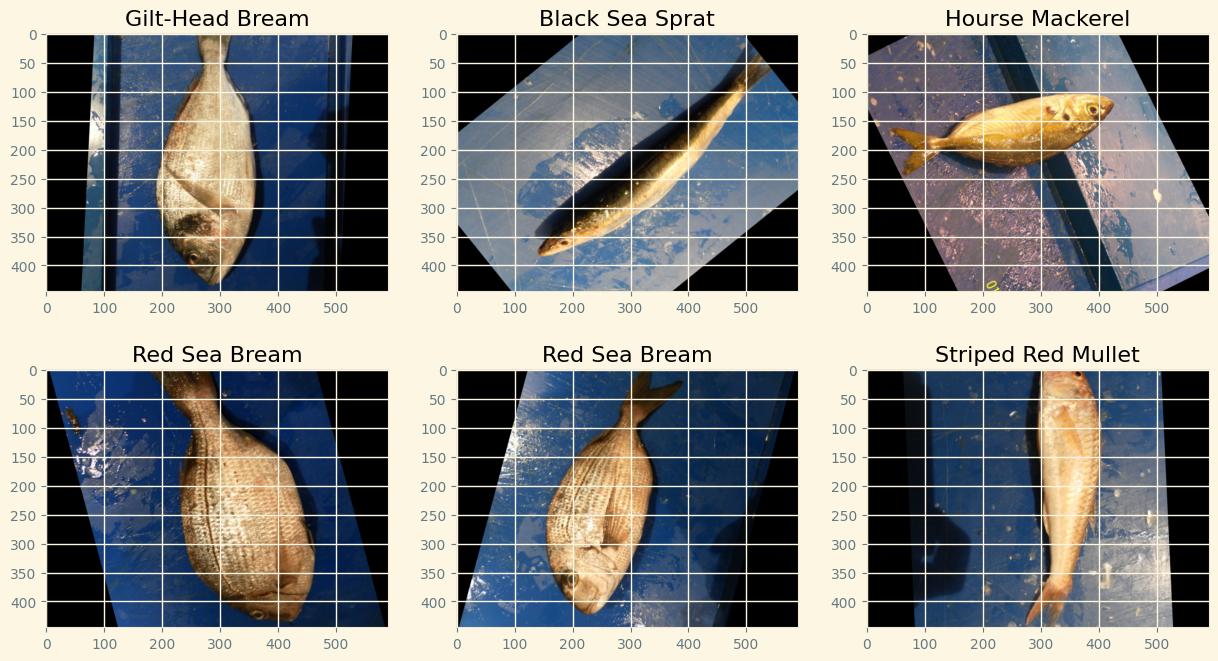

In [70]:
print(pred_df[pred_df['label']==pred_df['pred']].head(6))
fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
imlist=pred_df[pred_df['label']==pred_df['pred']].head(6).reset_index()
for i in range(0,6):
    ax[i].imshow(plt.imread(imlist['path'][i]))
    ax[i].set_title(imlist['label'][i])